<a href="https://colab.research.google.com/github/Akash35678/Person-Identification-using-transfer-learning/blob/main/facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import to_categorical

def preprocess_image(image_path, image_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    image = image.astype(np.float32) / 255.0
    return image

def load_images_from_folder(folder_path, image_size):
    images = []
    labels = []
    label_map = {}  # Dictionary to map person names to integer labels
    label_counter = 0

    for subdirectory in os.listdir(folder_path):
        subdirectory_path = os.path.join(folder_path, subdirectory)
        if os.path.isdir(subdirectory_path):
            label_map[subdirectory] = label_counter

            for filename in os.listdir(subdirectory_path):
                image_path = os.path.join(subdirectory_path, filename)
                image = preprocess_image(image_path, image_size)
                images.append(image)
                labels.append(label_counter)

            label_counter += 1

    return np.array(images), np.array(labels), label_map

# Set the path to the training and validation directories
train_directory = '/content/processed_dataset/train'
val_directory = '/content/processed_dataset/validation'

# Set the image size for preprocessing
image_size = (160, 160)

# Load and preprocess training images
x_train, y_train, label_map = load_images_from_folder(train_directory, image_size)

# Load and preprocess validation images
x_val, y_val, _ = load_images_from_folder(val_directory, image_size)

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=len(label_map))
y_val = to_categorical(y_val, num_classes=len(label_map))


In [ ]:
# Define the FaceNet model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=image_size + (3,)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_map), activation='softmax'))

# Specify the model optimizer and loss function
learning_rate = 0.001
optimizer = Adam(learning_rate)
loss_function = BinaryCrossentropy()

model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

# Create a checkpoint to save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
# Train the model
batch_size = 32
epochs = 20
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=batch_size, epochs=epochs, callbacks=[checkpoint])

Epoch 1/20
1/1 [==============================] - 0s 467ms/step - loss: 0.3771 - accuracy: 0.7619 - val_loss: 0.5109 - val_accuracy: 0.3333
Epoch 2/20
1/1 [==============================] - 0s 427ms/step - loss: 0.3357 - accuracy: 0.8571 - val_loss: 0.5408 - val_accuracy: 0.1667
Epoch 3/20
1/1 [==============================] - 0s 491ms/step - loss: 0.3364 - accuracy: 0.7619 - val_loss: 0.5522 - val_accuracy: 0.1667
Epoch 4/20
1/1 [==============================] - 0s 448ms/step - loss: 0.3305 - accuracy: 0.7619 - val_loss: 0.5471 - val_accuracy: 0.1667
Epoch 5/20
1/1 [==============================] - 0s 459ms/step - loss: 0.2813 - accuracy: 0.8095 - val_loss: 0.5409 - val_accuracy: 0.3333
Epoch 6/20
1/1 [==============================] - 0s 415ms/step - loss: 0.2940 - accuracy: 0.7619 - val_loss: 0.5453 - val_accuracy: 0.3333
Epoch 7/20
1/1 [==============================] - 0s 451ms/step - loss: 0.2240 - accuracy: 0.9048 - val_loss: 0.5545 - val_accuracy: 0.3333
Epoch 8/20
1/1 [====

In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

1/1 [==============================] - 0s 61ms/step - loss: 0.6530 - accuracy: 0.3333
Validation Loss: 0.6530
Validation Accuracy: 0.3333


In [ ]:
# Load and preprocess testing images
test_directory = '/content/processed_dataset/test'
x_test, y_test, _ = load_images_from_folder(test_directory, image_size)

# Convert labels to one-hot encoded vectors
y_test = to_categorical(y_test, num_classes=len(label_map))

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


1/1 [==============================] - 0s 72ms/step - loss: 0.3422 - accuracy: 0.6667
Test Loss: 0.3422
Test Accuracy: 0.6667


1/1 [==============================] - 0s 72ms/step - loss: 0.3422 - accuracy: 0.6667


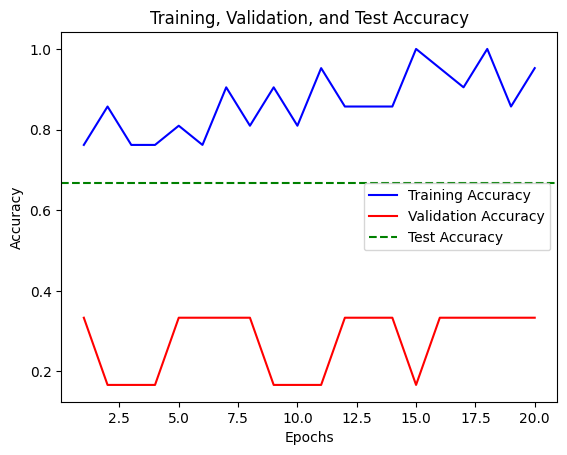

In [ ]:
import matplotlib.pyplot as plt

# Get the training, validation, and test accuracy values from the history object
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
test_accuracy = model.evaluate(x_test, y_test)[1]

# Plot the accuracy values
epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.axhline(test_accuracy, color='g', linestyle='--', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 [==============================] - 0s 135ms/step
Predicted Class: Abitha


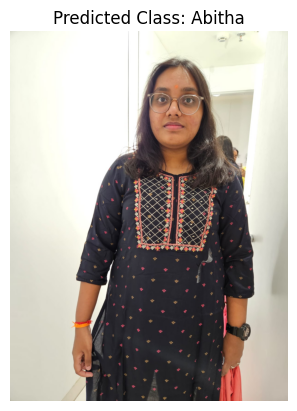

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image, image_size):
    image = cv2.resize(image, image_size)
    image = image.astype(np.float32) / 255.0
    return image

# Set the path to the single test image
image_path = '/content/WhatsApp Image 2023-06-11 at 15.29.38.jpg'

# Load and preprocess the test image
image = cv2.imread(image_path)
image = preprocess_image(image, image_size)

# Reshape the image for inference
image = np.expand_dims(image, axis=0)

# Perform inference with the trained model
predicted_probabilities = model.predict(image)
predicted_label = np.argmax(predicted_probabilities)
predicted_class_name = list(label_map.keys())[predicted_label]

# Print the predicted class name
print(f'Predicted Class: {predicted_class_name}')

# Display the image with the predicted class name
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_class_name}')
plt.axis('off')
plt.show()
